In [45]:
import pandas as pd

Importation du dataset 

In [46]:
df = pd.read_csv('Documents/Studies/Data_science/Data_sets/advertising.csv', error_bad_lines = False , sep= ',')

In [47]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [48]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
Visualisation des distibution. 

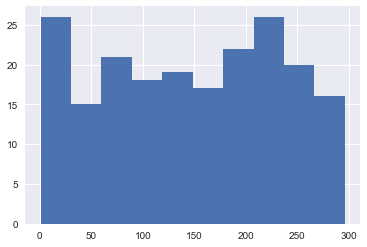

In [49]:
import matplotlib.pyplot as plt 
df['TV'].hist(bins = 10)

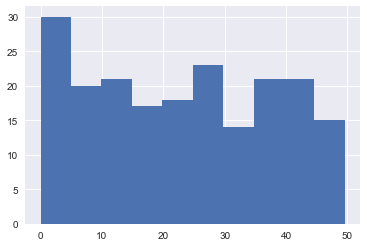

In [50]:
df['Radio'].hist(bins = 10)

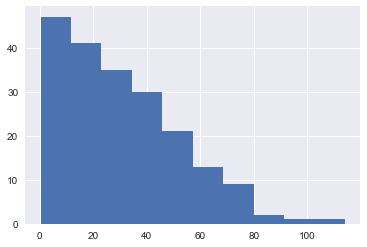

In [51]:
df['Newspaper'].hist(bins = 10)

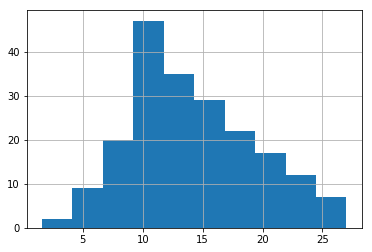

In [16]:
df['Sales'].hist(bins = 10)

Nous ne pouvons déduire une distribution exacte des variable du data avec une simple visualisation en histogramme, cependant
il reste un moyen qui permet d'avoir une première idée des variables 

l'outil Boxplot va nous permettre de voir s'il existe des valeur aberrantes, après résultat nous ne remarquons pas de trés importantes valeurs à supprimer. 

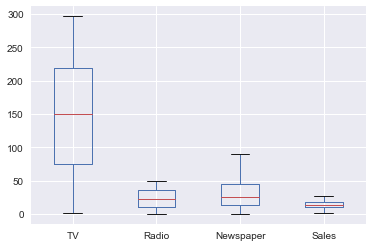

In [57]:
df.boxplot(column=['TV', 'Radio','Newspaper','Sales'])

Valeur Manquantes et nettoyage 

In [66]:
df.isna().count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [ ]:
Correlation 

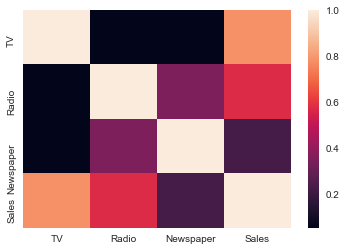

In [122]:
import seaborn as sns
corr= df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

La variable 'TV' est celle la plus corrélé !  

Les scatter plot 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011BBA73D3C8>,
      dtype=object)

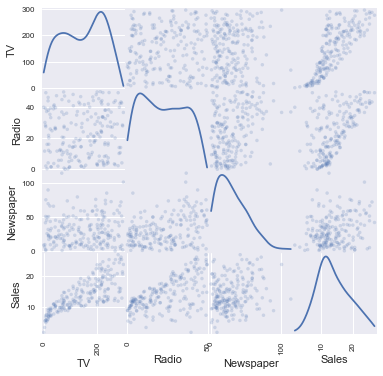

In [72]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

Nous traçons une matrice de scatter plot pour chacun de couples des variable, nous remarquons aussi que cette matrice contien une 
visualisation des distribution de chaque variables, qui est mieux clair qu'avant ! 

Modèle de regression univariables

In [73]:
import statsmodels.formula.api as smf

In [123]:
lm_radio = smf.ols(formula='Sales ~ Radio ', data=df).fit()
lm_TV= smf.ols(formula='Sales ~ TV ', data=df).fit()
lm_news= smf.ols(formula='Sales ~ Newspaper ', data=df).fit()

In [128]:
print(lm_radio.summary())
print(lm_TV.summary())
print(lm_news.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           4.35e-19
Time:                        20:28:06   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

In [94]:
from sklearn.metrics import mean_squared_error

In [98]:
y= lm_radio.predict(df)


In [103]:
mean_squared_error(df['Sales'],y)

18.09239774512544

In [110]:
x= df['Sales']

In [117]:
res = y- df['Sales']

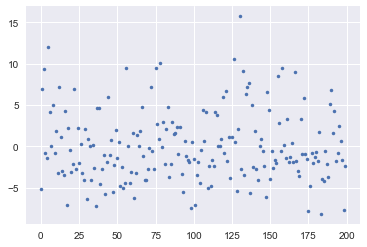

In [120]:
plt.plot(res,'.')

Nous avons trouvé des valeur du R², du MSE qui ne sont pas satisfaisant des le premier test du modèle univariate,
chose qui se voit bien dans le plot des residuals, ce qui rend la comparaison entre les modèles de chaque variable sans importance. 
Le fait que le coefficient de regression de la variable Radio est plus petit que celui de TV malgré cette différence de corrélation c'explique par le fait que le coeficcient de corrélation influence ce paramètre dans un modèle univariables

Pour que le coefficient de regression refleter l'importance de la variable il est bien necessaire de normaliser le dataset. 

In [131]:
normalized_df=(df-df.min())/(df.max()-df.min())

L'intercept dans le modèle de "sales-TV" represente alors le nombre de vente qui ne sont pas géneré par la publicité en Télevision, il est bien égale dans un intervale [0.975] à 8 unités. 


Modèle multivariables. 

In [140]:
lm_multi = smf.ols(formula='Sales ~ Radio + TV + Newspaper ', data=df).fit()
print(lm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           1.58e-96
Time:                        21:00:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

La premiere chose la plus remarquable dans le résultat est le P_value du predicteur Newsspaper, ainsi qu'on observons encore plus en detail, nous remarquons que son coefficient de regression est aussi faible, ce qui le rend sans importance. 
L'augmentation des sommes allouées au TV par 50, generera une augmentation des vente par ce meme nombre multiplié par le cooeffcient de regression de cette meme variable, chose qui est bien evident dans une équation linéaire. 


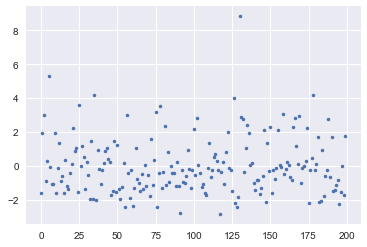

In [137]:
y= lm_multi.predict(df)
x= df['Sales']
res = y- df['Sales']
plt.plot(res,'.')

In [141]:
lm_multi2 = smf.ols(formula='Sales ~ Radio + TV  ', data=df).fit()
print(lm_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           4.83e-98
Time:                        21:00:45   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

Modèle avec moins de variables, et le meme R², il est toujours préferé ! 

In [142]:
lm_multip = smf.ols(formula='Sales ~ Radio + TV + TV*Radio', data=df).fit()
print(lm_multip.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          6.68e-146
Time:                        21:03:09   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

Je pense que le fait d'integrer le produit des deux variables dans le modèle, implique l'utilisation de ces deux moyens
pour la communication des produits, ce qui rends le modèle plus perforemant.  